<a href="https://colab.research.google.com/github/ArtuomMerkulov/ArtuomMerkulov/blob/main/%22%D0%9E%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%8D%D0%BC%D0%BE%D1%86%D0%B8%D0%B8_%D0%BE%D1%82_%D0%B4%D0%B5%D0%B3%D1%83%D1%81%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%B2%D0%B8%D0%BD%D0%B0%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install FER
!pip install tensorflow==2.7.0 -q

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.1/812.1 KB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.6/489.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 KB 32.7 MB/s eta 0:00:00


In [2]:
import scipy
import tensorflow as tf

from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Concatenate, LeakyReLU
from keras.layers import BatchNormalization, Add, add
from keras.layers import UpSampling2D, Conv2D
from keras.applications import vgg19
#from keras.utils import plot_model
from tensorflow.keras.utils import plot_model
#from tensorflow.keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing.image import img_to_array, load_img
#from keras.models import Sequential, Model
from keras.models import Sequential, Model
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
import keras.backend as K
from tqdm import tqdm
from tensorflow.python.platform.tf_logging import set_verbosity, FATAL
set_verbosity(FATAL)
import glob
import math

from fer import FER

os.environ["TF_CPP_MIN_LOG_LEVEL"] = '3'

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip '/content/drive/MyDrive/Numpy/wine.zip'

Archive:  /content/drive/MyDrive/Numpy/wine.zip
   creating: wine taster/
  inflating: wine taster/белое, empathy, 4.png  
  inflating: __MACOSX/wine taster/._белое, empathy, 4.png  
  inflating: wine taster/белое, franzia, 8.png  
  inflating: __MACOSX/wine taster/._белое, franzia, 8.png  
  inflating: wine taster/красное, clos siguier, 1.png  
  inflating: __MACOSX/wine taster/._красное, clos siguier, 1.png  
  inflating: wine taster/красное, freakshow, 9.png  
  inflating: __MACOSX/wine taster/._красное, freakshow, 9.png  
  inflating: wine taster/красное, intrinsic wine, 10.jpeg  
  inflating: __MACOSX/wine taster/._красное, intrinsic wine, 10.jpeg  
  inflating: wine taster/красное, decoy limited, 9.jpeg  
  inflating: __MACOSX/wine taster/._красное, decoy limited, 9.jpeg  
  inflating: wine taster/красное, lamole chianti classico, 3.png  
  inflating: __MACOSX/wine taster/._красное, lamole chianti classico, 3.png  
  inflating: wine taster/белое, kleine zeize, 9.jpeg  
  inflatin

In [24]:
images_paths = sorted(glob.glob("/content/wine taster/красное, sterling, 2.jpeg"))
print(f"Number of images in this dataset: {len(images_paths)}")

Number of images in this dataset: 1


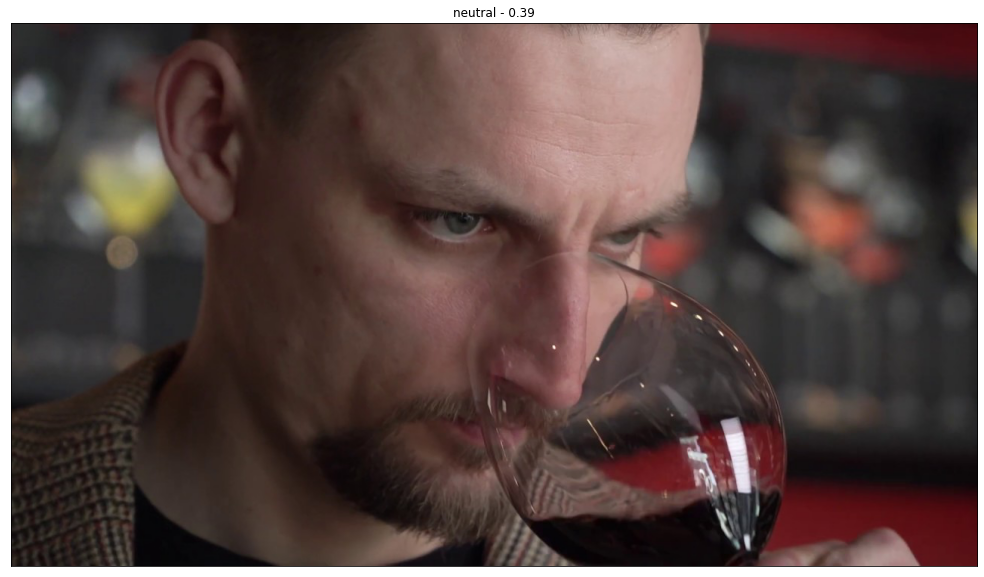

In [25]:
num_cols = 1
num_rows = int(len(images_paths) / num_cols)

for i in range(num_rows):
    plt.figure(figsize=(20, 10))
    for j in range(num_cols):
        plt.subplot(1, num_cols, j + 1)
        image_num = i * num_cols + j

        if image_num >= len(images_paths):
            break

        image = plt.imread(images_paths[image_num])
        emotion_detector = FER(mtcnn=True)
        dominant_emotion, emotion_score = emotion_detector.top_emotion(image)

        plt.imshow(image)
        plt.title(f"{dominant_emotion} - {emotion_score}")
        plt.xticks([])
        plt.yticks([])

    plt.show()